### Torch Audio

이번 pytorch 1.2 버전과 함께 나온 torchaudio라이브러리의 튜토리얼 문서의 번역버전입니다.

In [1]:
import torch
import torchaudio
import matplotlib.pyplot as plt
# 파일디렉토리에 음성, 음악 파일을 넣어줍시다.
filename = "input/pop.wav"
# 데이터를 load하면 바로 torch 파일로 올라가게 됩니다.
waveform, sample_rate = torchaudio.load(filename)
waveform, waveform.size()

Duplicate key in file '/Users/seungheondoh/.matplotlib/matplotlibrc' line #2.


(tensor([[-0.0250, -0.0182, -0.0202,  ..., -0.3651, -0.4238, -0.4239]]),
 torch.Size([1, 661504]))

시각화를 할때는 Shape을 고려해서 Transpose를 해야합니다. [1,661504] -> [661504,1] 로 바꾸어줍시다.

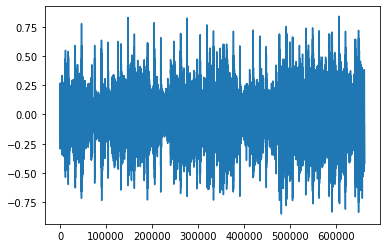

In [2]:
plt.figure()
plt.plot(waveform.t().numpy())

### Normalize

In [3]:
def normalize(tensor):
    # Subtract the mean, and scale to the interval [-1,1]
    tensor_minusmean = tensor - tensor.mean()
    return tensor_minusmean/tensor_minusmean.abs().max()

In [4]:
waveform = normalize(waveform)

In [5]:
waveform

tensor([[-0.0294, -0.0214, -0.0238,  ..., -0.4290, -0.4980, -0.4981]])

### 데이터 전처리

- Resample: 샘플링 레이트를 변경해서 다시 샘플링을 진행합니다.
- Spectrogram: STFT를 통해 Frequency영역대를 가지게 되는 Spectrogram을 만들어냅니다.
- MelScale: normal STFT을 Mel-frequency STFT로 튜닝합니다. Conversion matrix를 활용합니다.
- AmplitudeToDB: Spectrogram을 power/amplitude scale에서 decibel scale로 변경합니다.
- MFCC: Waveform에서 Mel-frequency cepstrum coefficients을 추출해 냅니다.
- MelSpectrogram: MEL Spectrograms울 STFT를 기반으로 만들어 냅니다.
- MuLawEncoding: mu-law companding 기반으로 Waveform을 인코딩합니다.
- MuLawDecoding: mu-law companding 기반으로 Waveform을 디코딩합니다.

In [6]:
function = torchaudio.transforms.Spectrogram()

In [7]:
specgram = torchaudio.transforms.Spectrogram()(waveform)
specgram[0][0]

tensor([3.7269e-03, 9.2530e-04, 1.6387e-02,  ..., 7.2181e+01, 1.9250e+00,
        2.5144e+01])

In [8]:
melspecgram = torchaudio.transforms.MelSpectrogram()(waveform)
melspecgram[0][0]

tensor([0., 0., 0.,  ..., 0., 0., 0.], grad_fn=<SelectBackward>)